✅ Dataset Loaded Successfully!
Shape of dataset: (2126, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None

Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV     

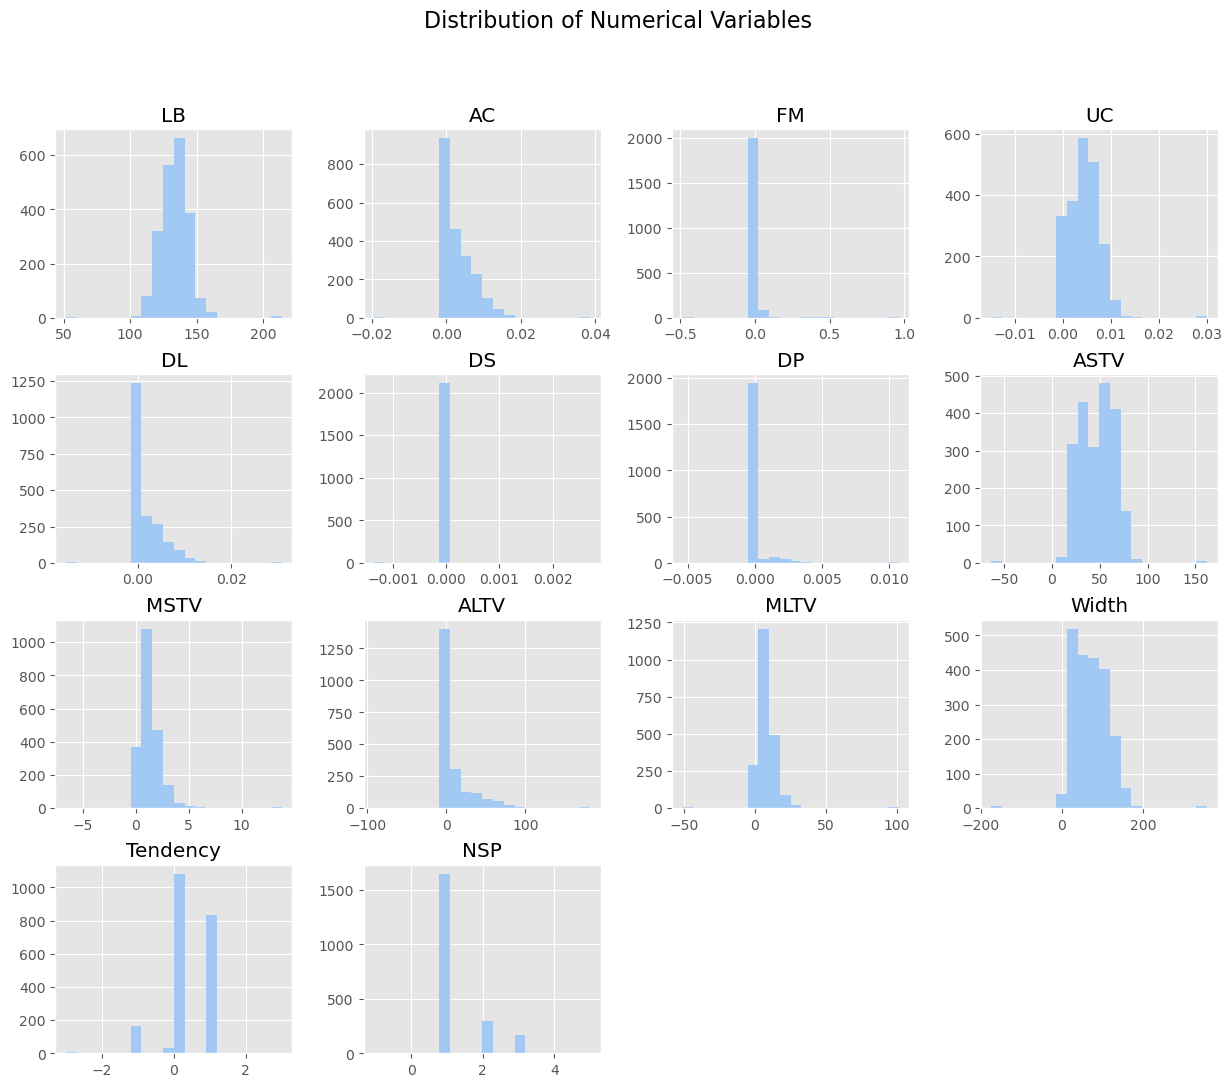

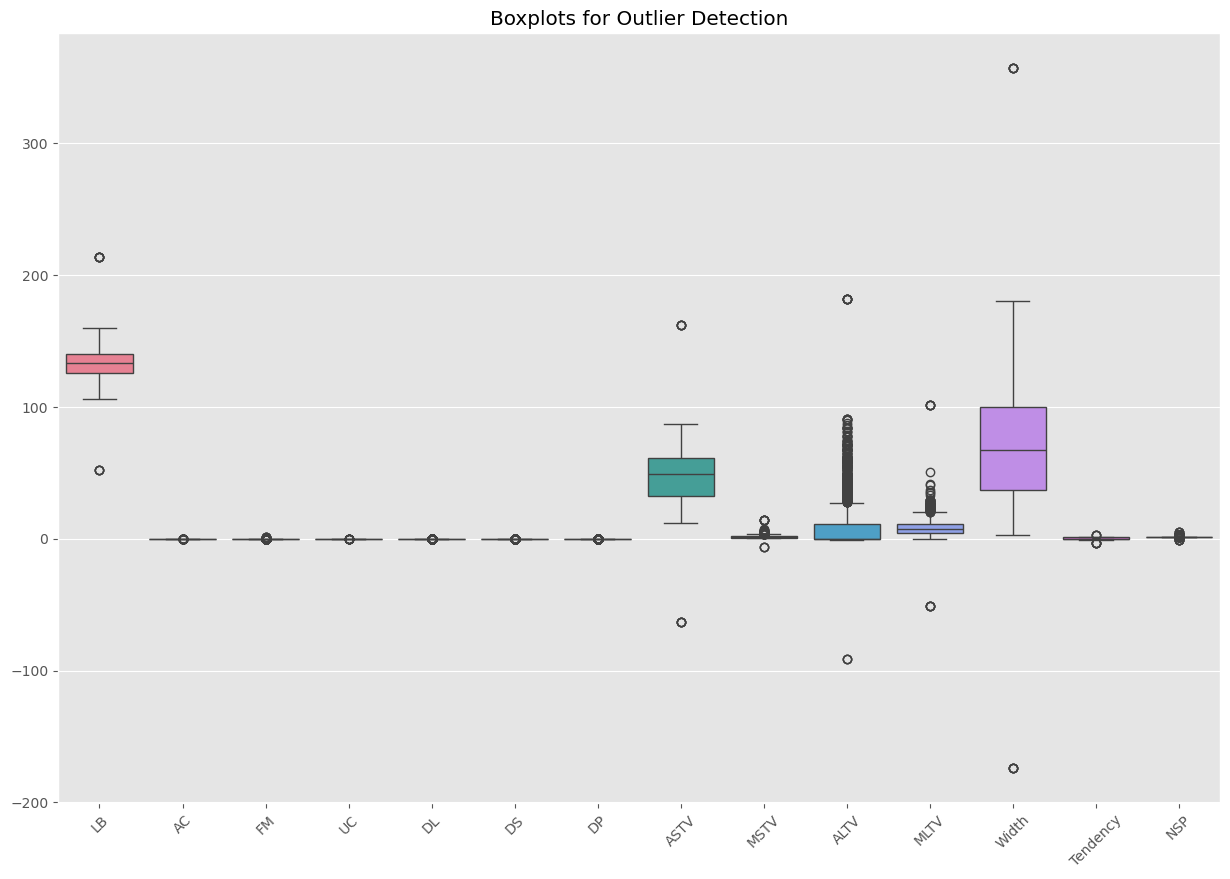

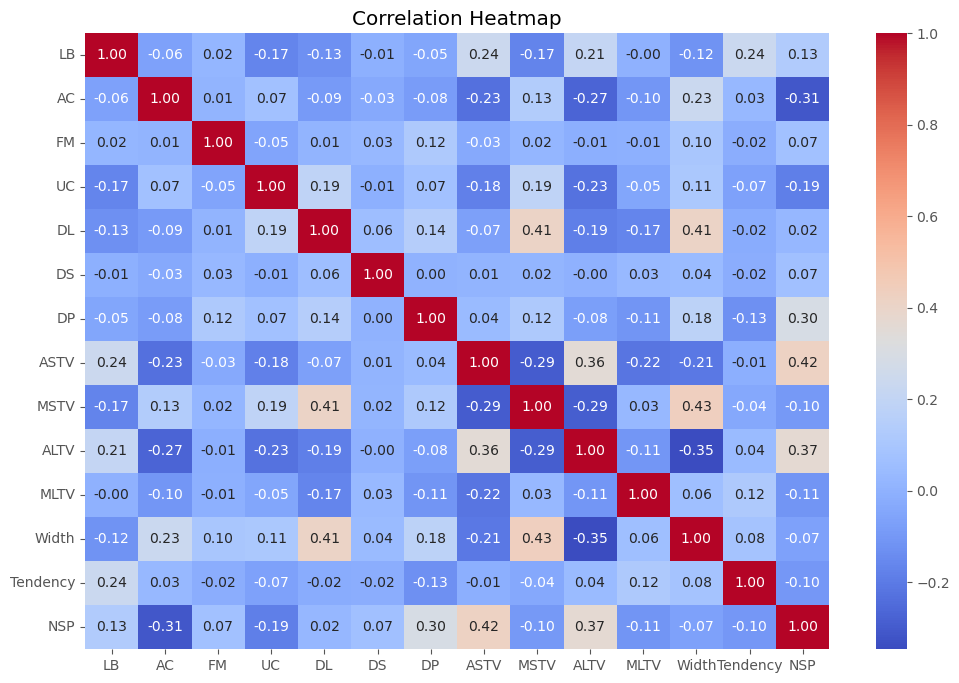

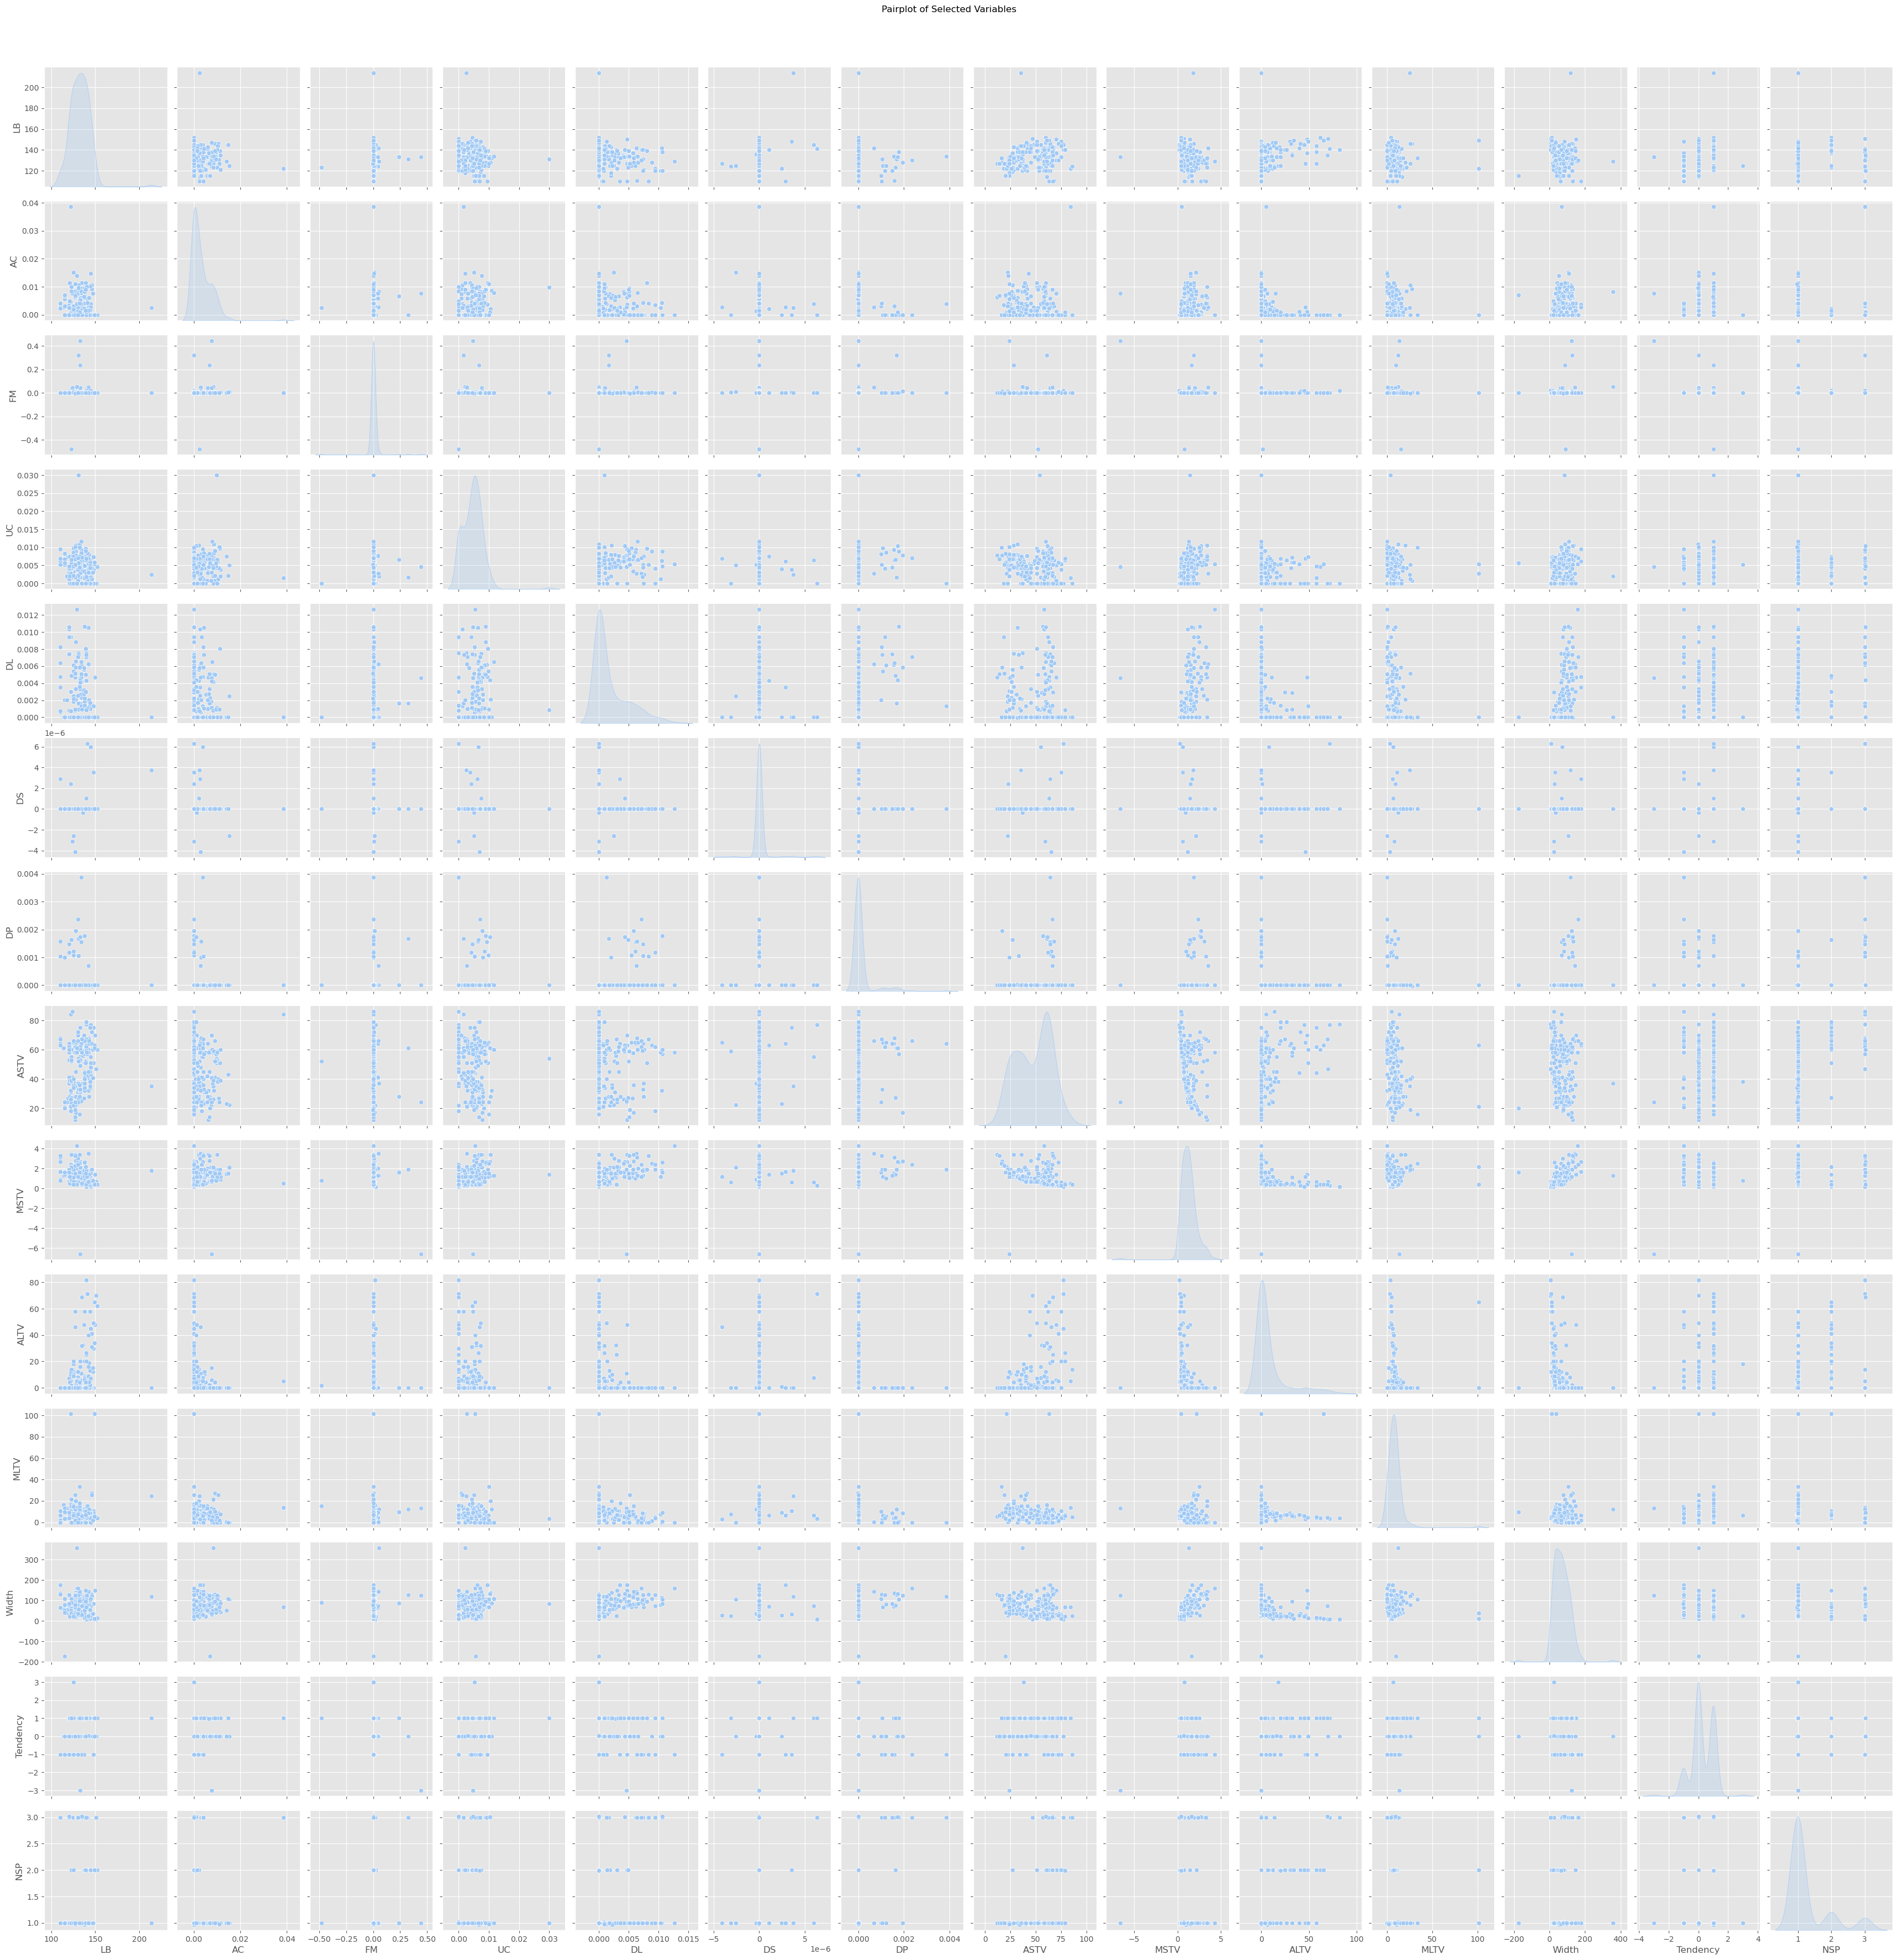

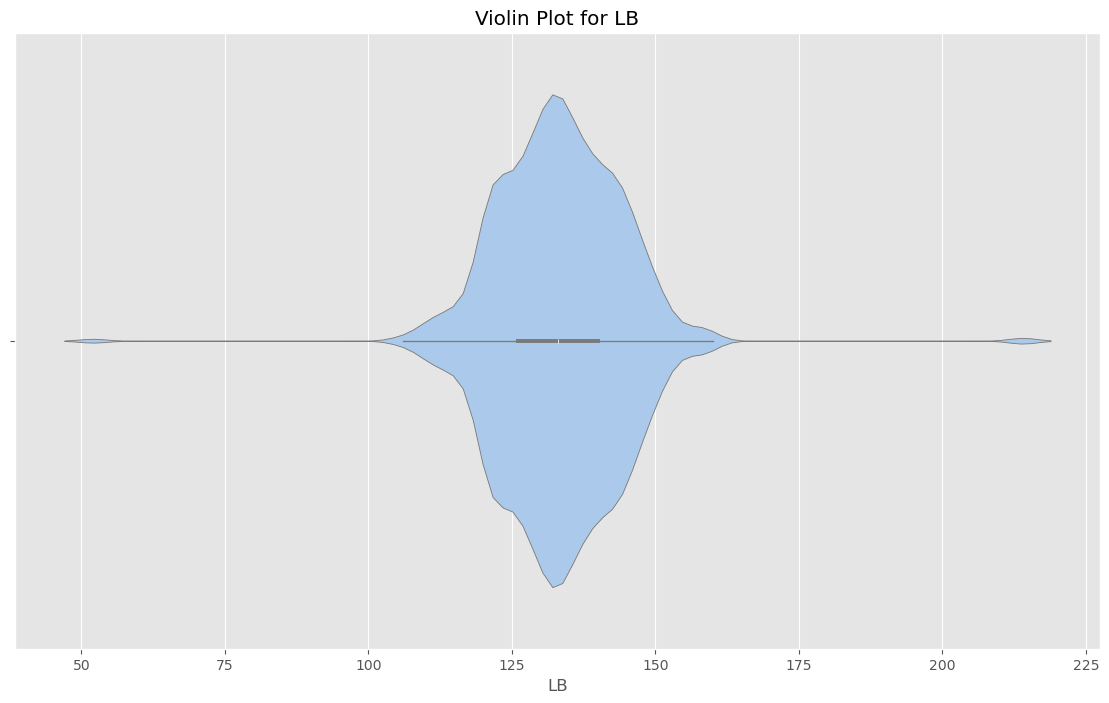

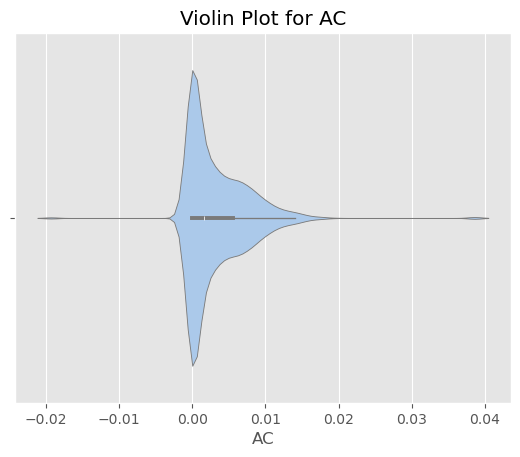

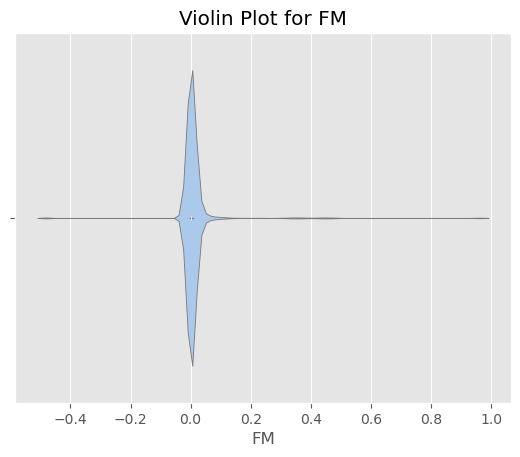

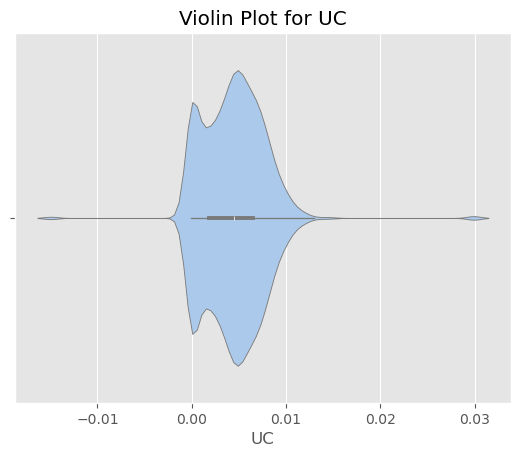

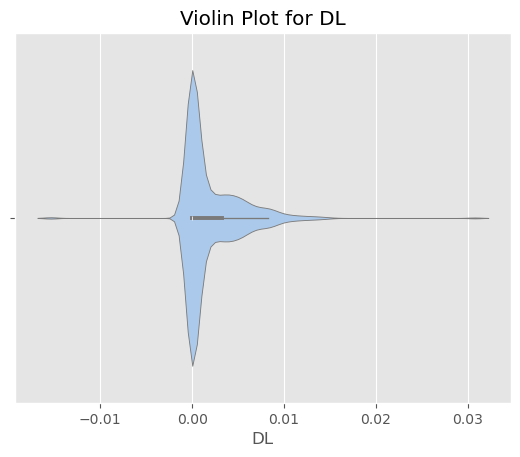

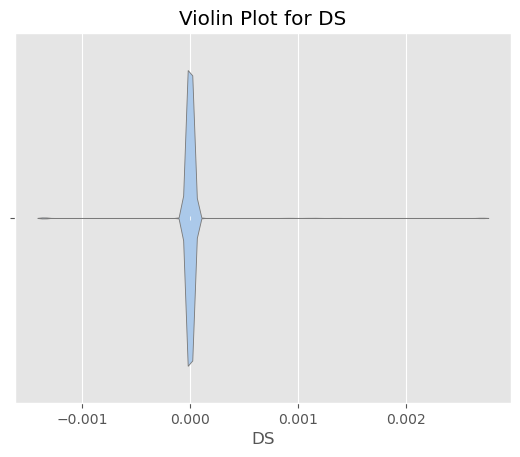


Highly Correlated Features (corr > 0.7):
Empty DataFrame
Columns: []
Index: []

✅ EDA Summary:
- Dataset cleaned and prepared (no missing values, consistent datatypes).
- Statistical summaries reveal mean and variability across features.
- Correlation heatmap shows relationships (e.g., LB vs ASTV, MSTV vs MLTV).
- Visualizations highlight possible outliers and data distributions.
- Useful for identifying fetal distress indicators and patterns.



In [3]:
# CARDIOTOCOGRAPHIC EDA

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 5️ Conclusions
print("""
✅ EDA Summary:
- Dataset cleaned and prepared (no missing values, consistent datatypes).
- Statistical summaries reveal mean and variability across features.
- Correlation heatmap shows relationships (e.g., LB vs ASTV, MSTV vs MLTV).
- Visualizations highlight possible outliers and data distributions.
- Useful for identifying fetal distress indicators and patterns.
""")


In [4]:
# Configure visualizations
plt.style.use('ggplot')
sns.set_palette('pastel')

# Load Dataset
df = pd.read_csv('Cardiotocographic.csv')
print("✅ Dataset Loaded Successfully!")
print(f"Shape of dataset: {df.shape}")


✅ Dataset Loaded Successfully!
Shape of dataset: (2126, 14)


In [5]:
# 1️ Data Cleaning & Preparation
# Check basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Convert data types if necessary
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].astype(float)
        except:
            pass

# Handle missing values (if any)
df = df.fillna(df.median(numeric_only=True))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None

Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency 

In [6]:
# 2️ Statistical Summary

print("\nStatistical Summary:")
print(df.describe().T)

# Compute additional statistics
summary_stats = pd.DataFrame({
    'mean': df.mean(),
    'median': df.median(),
    'std': df.std(),
    'iqr': df.quantile(0.75) - df.quantile(0.25)
})
print("\nAdditional Summary Statistics:")
print(summary_stats)



Statistical Summary:
           count        mean        std         min         25%         50%  \
LB        2124.0  133.338641  11.212447   51.842487  126.000000  133.000000   
AC        2124.0    0.003205   0.004374   -0.019284    0.000000    0.001634   
FM        2124.0    0.009904   0.067571   -0.480634    0.000000    0.000000   
UC        2124.0    0.004394   0.003340   -0.014925    0.001858    0.004486   
DL        2124.0    0.001897   0.003344   -0.015393    0.000000    0.000000   
DS        2124.0    0.000002   0.000141   -0.001353    0.000000    0.000000   
DP        2124.0    0.000174   0.000836   -0.005348    0.000000    0.000000   
ASTV      2124.0   47.012459  18.812403  -63.000000   32.000000   49.000000   
MSTV      2124.0    1.364345   1.174084   -6.600000    0.700000    1.200000   
ALTV      2124.0   10.295650  21.212676  -91.000000    0.000000    0.000000   
MLTV      2124.0    8.271840   7.736910  -50.700000    4.600000    7.400000   
Width     2124.0   70.431643  

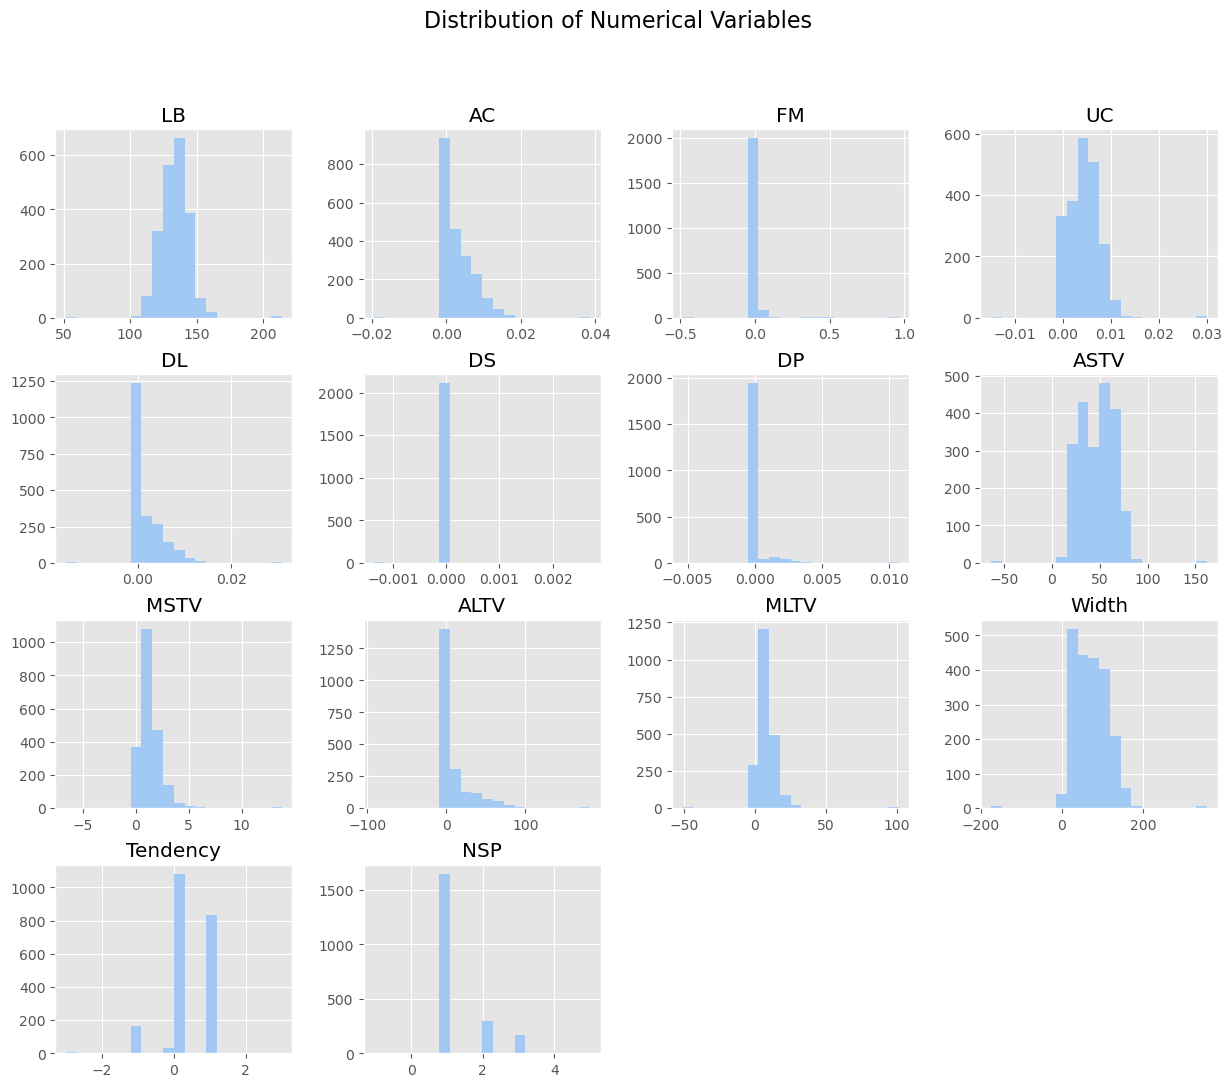

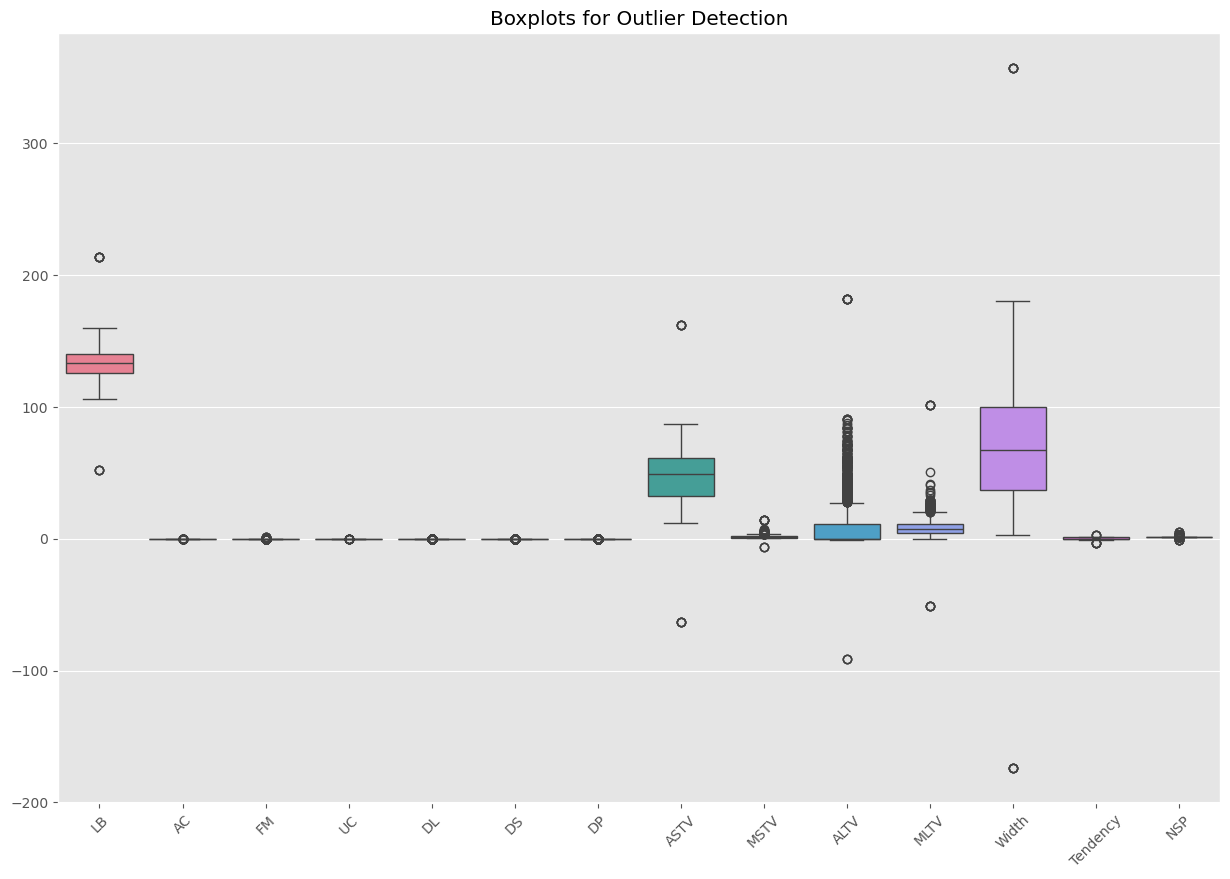

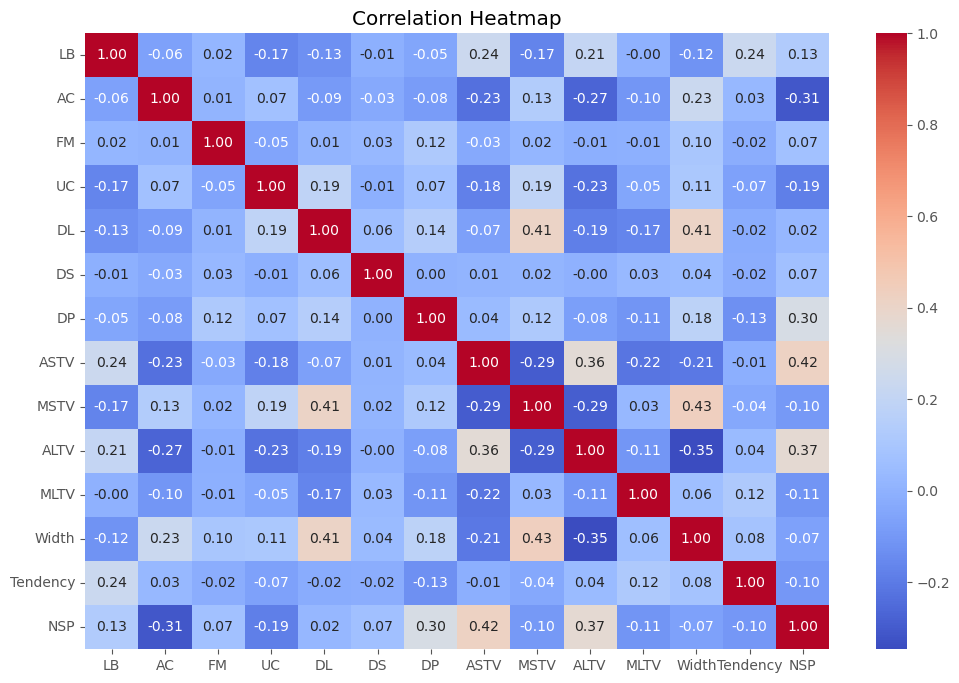

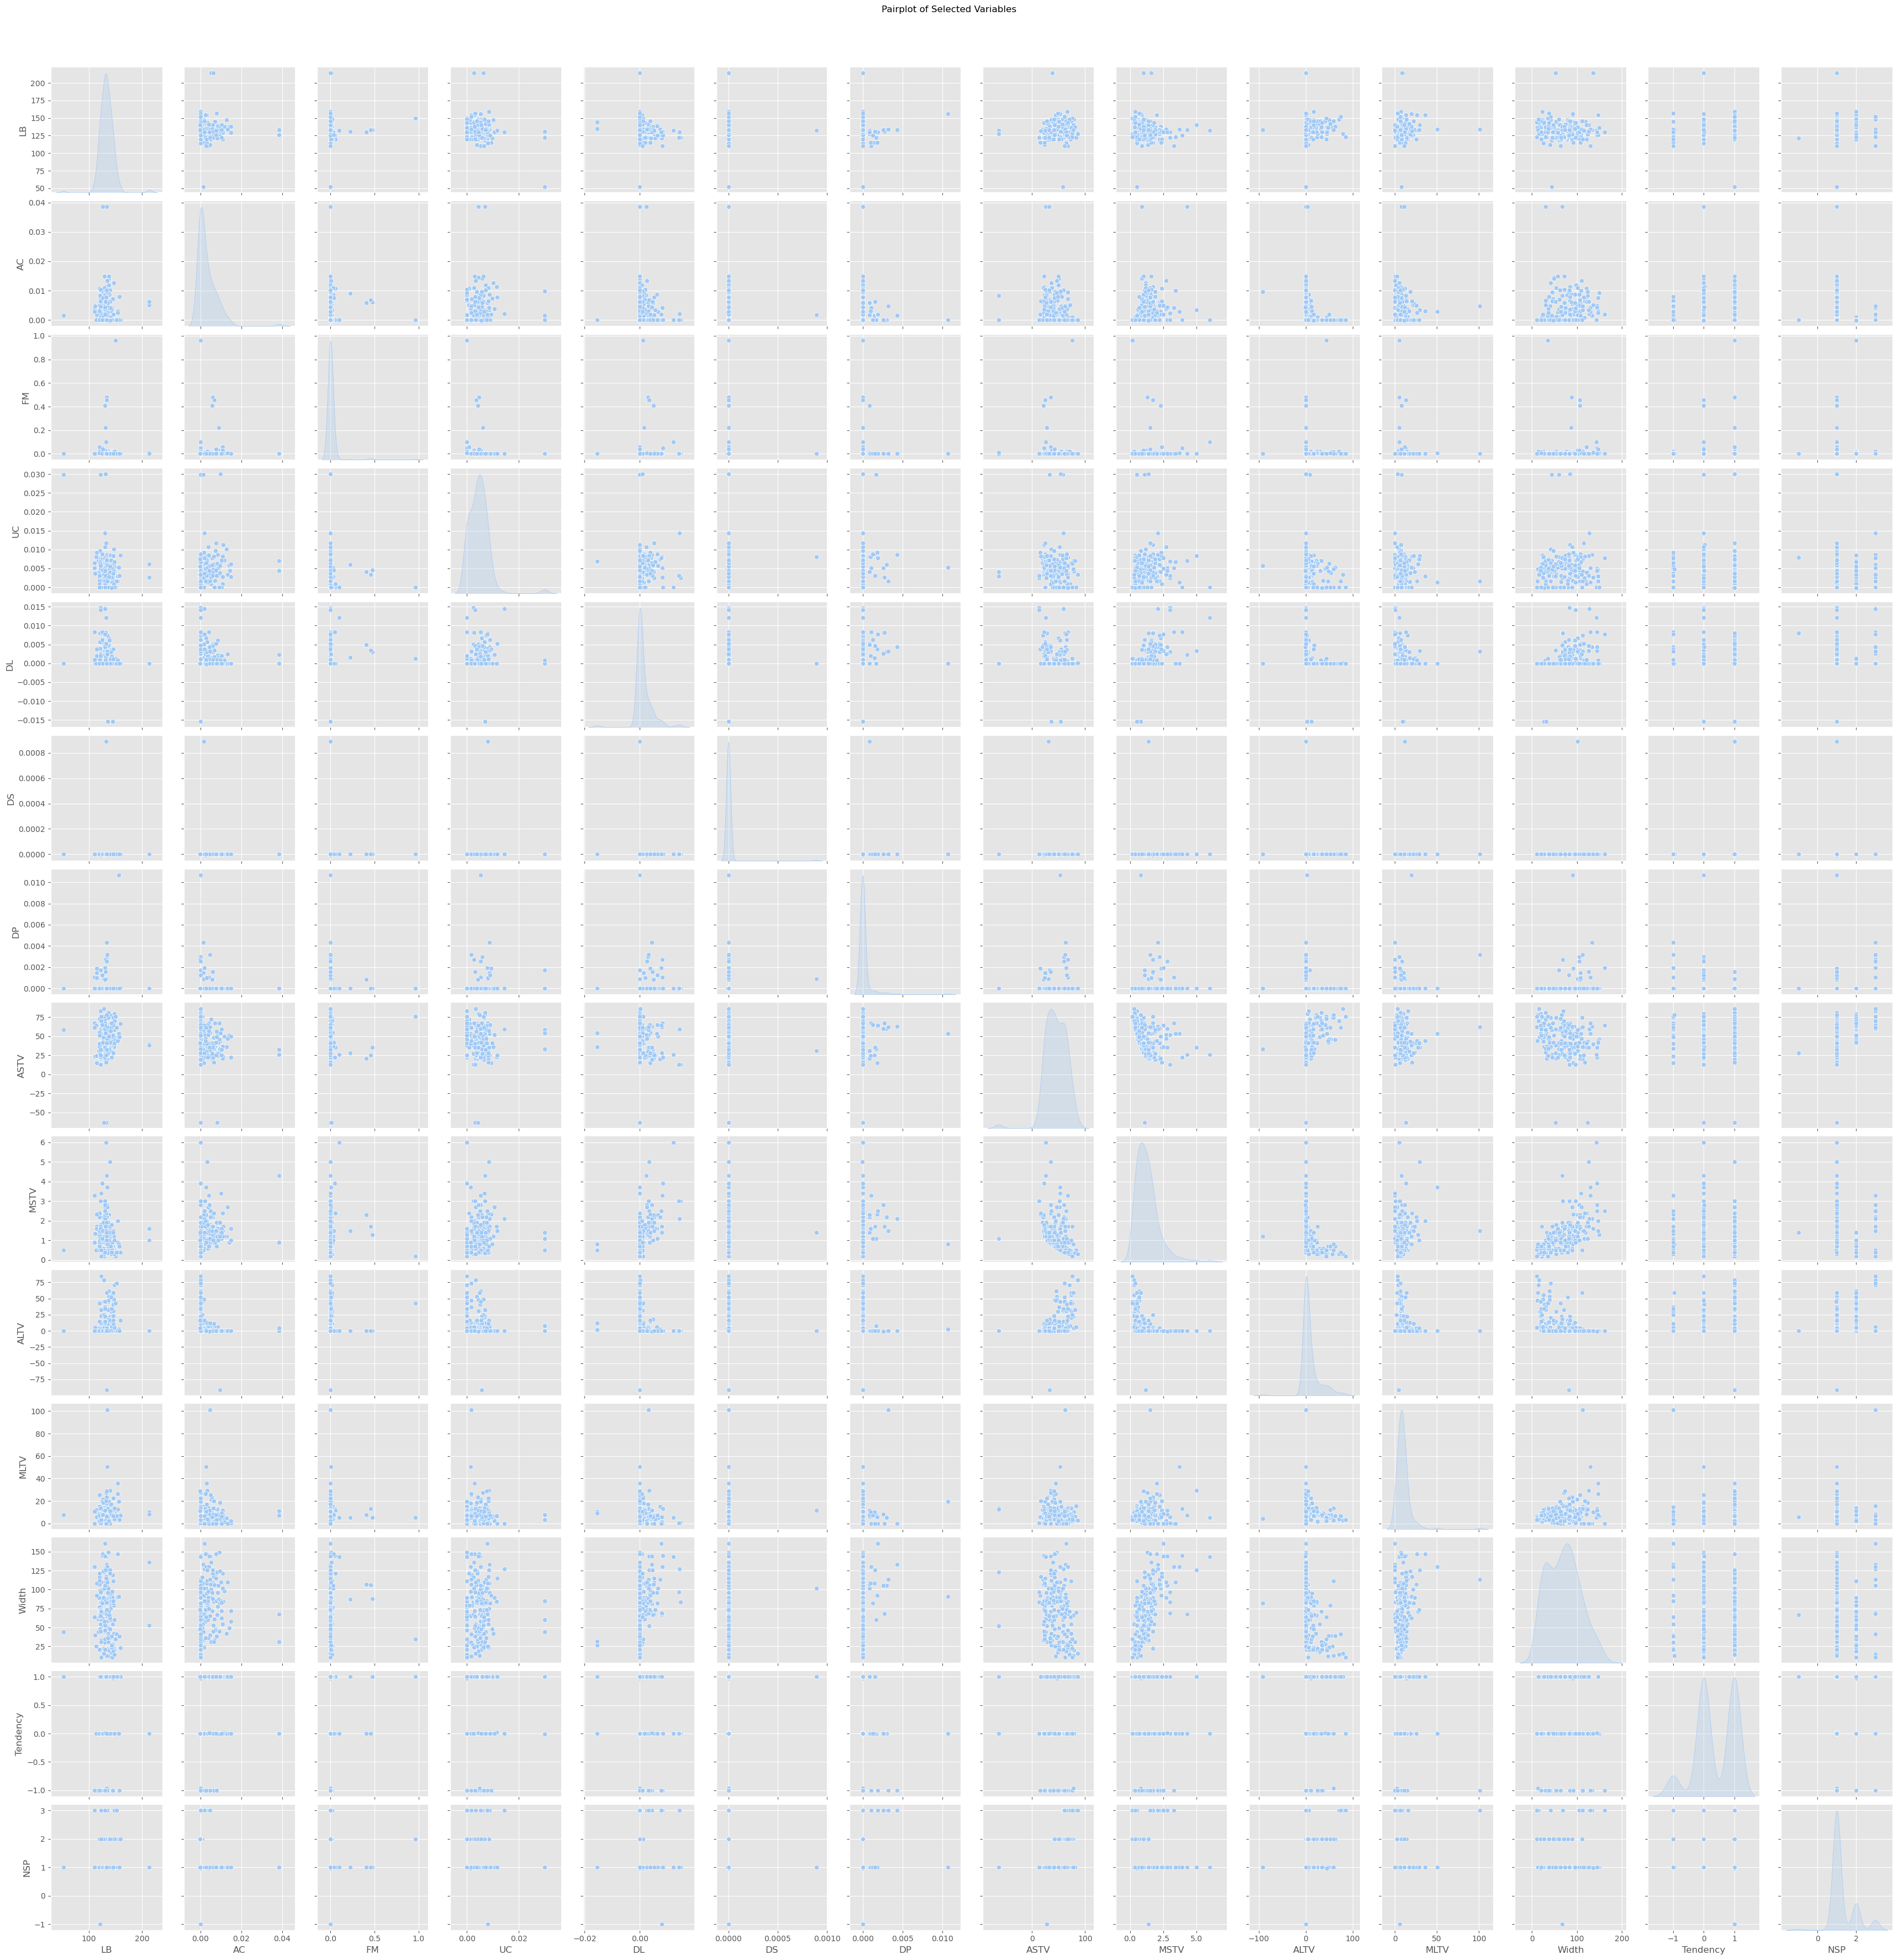

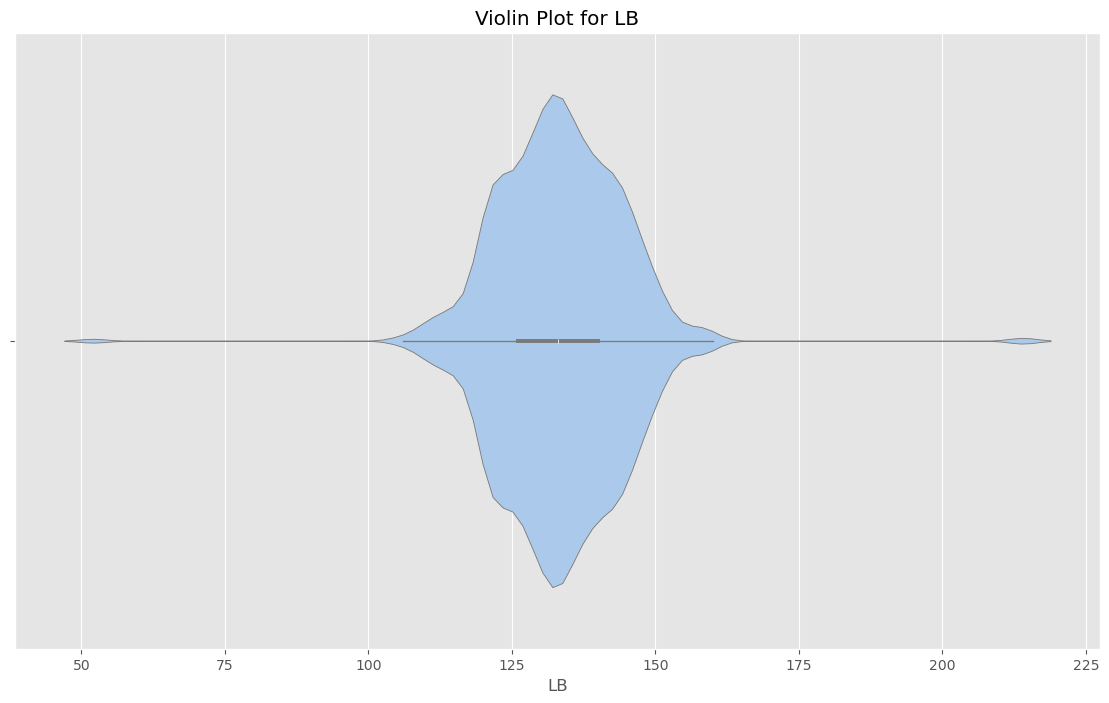

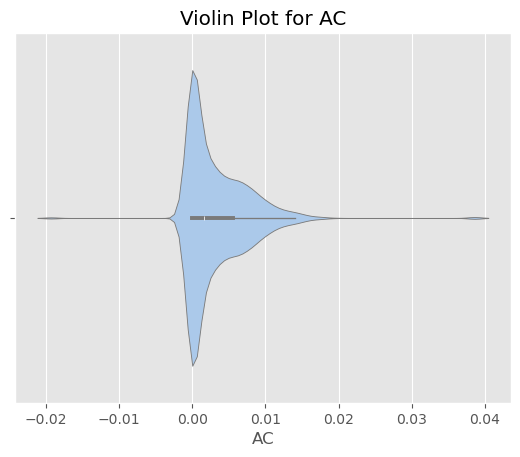

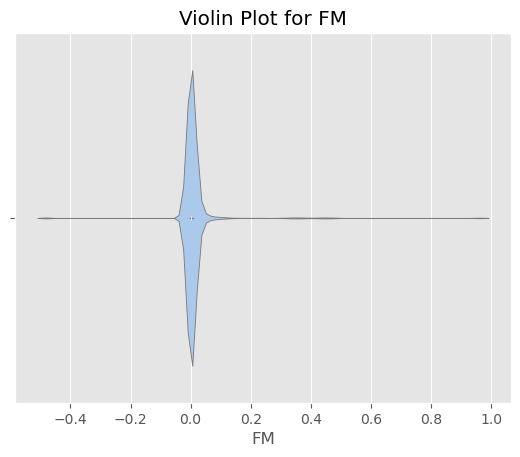

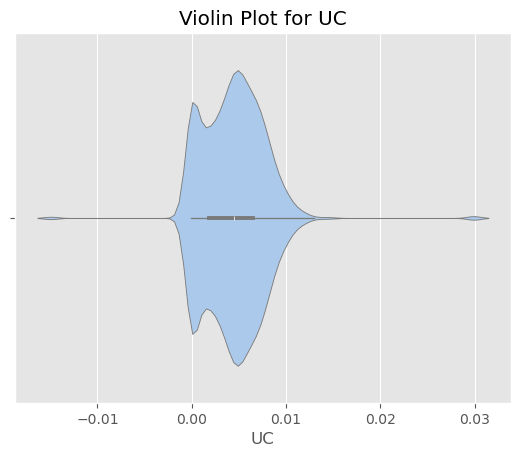

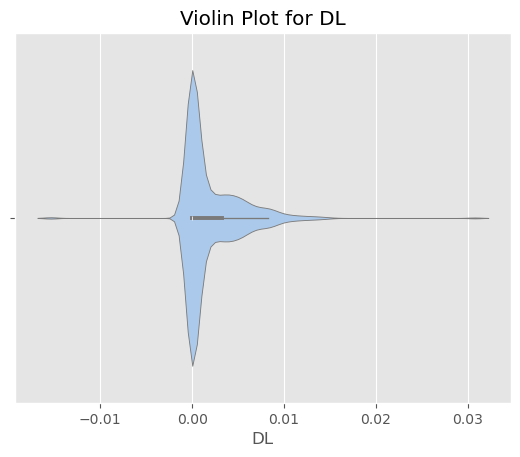

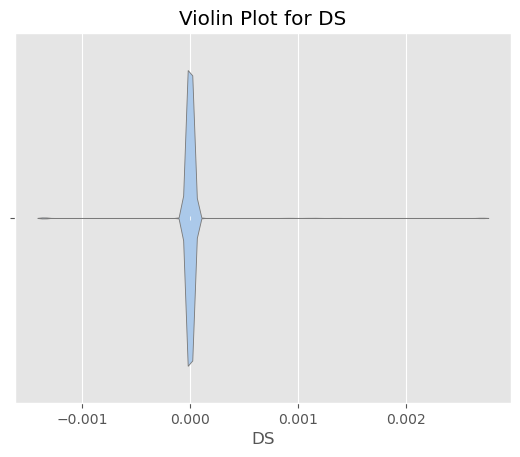

In [7]:
# 3️ Data Visualization
# Histogram for numeric columns
df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationships
sns.pairplot(df.sample(min(200, len(df))), diag_kind='kde')
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

# Violin plots for variability
plt.figure(figsize=(14, 8))
selected_features = df.columns[:6]
for feature in selected_features:
    sns.violinplot(x=feature, data=df)
    plt.title(f"Violin Plot for {feature}")
    plt.show()

In [8]:
# 4️ Pattern Recognition & Insights
corr = df.corr()
high_corr = corr[(corr > 0.7) & (corr < 1.0)]
print("\nHighly Correlated Features (corr > 0.7):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))


Highly Correlated Features (corr > 0.7):
Empty DataFrame
Columns: []
Index: []
